In [1]:
import torch
import matplotlib.pyplot as plt

# if you don't have gpu, 
# you can set device='cpu'
device = f'cuda:0'

- In this exercise, you will train a simple neural network using given matrices ($\{X_i\}^N_{i=1}, X_i \in \mathbb{R}^{N\times N}$) and their corresponding vectors ($\{Y_i\}^N_{i=1}, Y_i \in \mathbb{R}^{N}$).

Q1) Load 'Matrices.pt', 'Vectors.pt' in 'data' folder using pytorch library.

In [2]:
X = torch.load('data/Matrices.pt')
Y = torch.load('data/Vectors.pt')

Q2) Here, we provide a simple fully connected nueral network. Check the given data, complete the model.

In [3]:
from models.modules import FC_vec
model = FC_vec(
    in_chan=4*4,
    out_chan=4,
    l_hidden=[1024, 1024, 1024],
    activation=['relu', 'relu', 'relu'],
    out_activation='linear',
).to(device)

Q3) Define a proper loss function and train the neural network.

In [4]:
num_epoch = 200
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=num_epoch)

l_losses = []
for epoch in range(num_epoch):
    for (x_batch, y_batch) in zip(X.split(100),Y.split(100)):
        optimizer.zero_grad()
        out = model(x_batch.flatten(start_dim=1))

        loss = ((out - y_batch.to(device))**2).mean()

        l_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        scheduler.step()
    if epoch%50 == 0:
        print(loss.item())
        

41.03360366821289
0.5525913238525391
0.22641894221305847
0.0631512850522995


- Plot the loss curve.

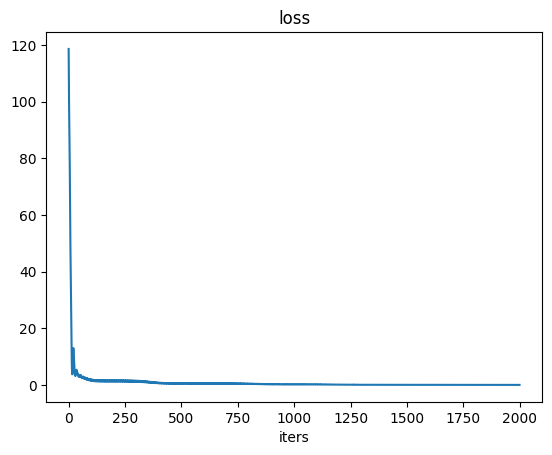

In [5]:
plt.title('loss')
plt.xlabel('iters')
plt.plot(l_losses)
plt.show()

- Now, you will transform the given input matrices $X_i$ into $PX_iP^{-1}$ using any nonsingular matrix $P \in \mathbb{R}^{N \times N}$.
- You would have learned that the eigenvalues of a matrix remain unchanged when the matrix is multiplied in the aforementioned ways.

Q4) Check that the eigenvalues of $X_i$ are $Y_i$. (You need to sort the eigenvalues) 

And check that the eigenvalues of $PX_iP^{-1}$ remain unchanged in comparison to those of X for any matrix $P$.

In [6]:
X_ev, _ = torch.sort(torch.linalg.eigvals(X).real)
print(torch.norm(X_ev - Y))

tensor(0.0002, device='cuda:0')


In [8]:
P = torch.rand(4,4).repeat(len(X),1,1).to(device)
PXinvP = P@X@torch.linalg.inv(P)
PXinvP_ev, _ = torch.sort(torch.linalg.eigvals(PXinvP).real)
print(torch.norm(PXinvP_ev - Y))

tensor(0.0007, device='cuda:0')


Q5) Using the learned neural network, compare the output of the transformed matrices $PX_iP^{-1}$ with $Y_i$.

In [9]:
output = model(PXinvP.flatten(start_dim=1))
print(torch.norm(output - Y))

tensor(1982.3192, device='cuda:0', grad_fn=<CopyBackwards>)


Q6) Interpret the results.

Neural network can not learn the eigenvalues of the matrices.